# Energy Consumption and Demand in the US 

link to our github repository: https://github.com/akkij26/info_2950

### Disclaimer

*Our research focus/question changed drastically during the phase 2 process. We did some initial cleaning and analysis on our preliminary data, but eventually decided to refocus our attention. We had some data on renewable energy generation in the US that we were planning on using simply to contextualize our initial question, which dealt primarily with placement of windmills so as to generate the most amount of energy while also being considerate of other social, environmental, and economic factors. As we progressed in our research, however, we decided that refocusing our question would require more data on energy usage and production (and via what source), so we went looking for better datasets. While we did find better datasets eventually and we understand that this is simply part of the process, we wanted to acknowledge some of the work that did go into phase 2 but which will, more likely than not, be scrapped in the final phase of this project. As such, we keep that preliminary work in this notebook, but we are sure to note explicitely which datasets we will probably not be using in future.*

<a id=’introduction’></a>
## Introduction

The 2022 global energy crisis began shortly after the Covid-19 pandemic in 2021, which has affected quite literally everyone. We observe it everyday - increased gas prices, headlines about oil exports, etc. This crisis is not limited to the energy industry but is bound to have a domino effect on other sectors like the food sector, labor industry and all possible parts of the economy. We are staring at a global shortage which must be addressed. Moreover, the use of fossil fuels will have to hit a decline in the coming years, not only due to remaining quantity, but also because of its negative and cyclical effects upon the environment. We got interested in the energy sector mainly because of the dire effects it can have if we do not deal with its ever increasing consumption demands, but also with the deleterious consequences of no changes being made in our current energy consumption/production. We are therefore interested in understanding how well equipped we are to deal with this predicted global shortage. We also wish to propose alternatives in terms of renewable energy and in doing so plan on analyzing different energy sources to find the most optimal switch while remaining economically sound. 

Throughout the process of Phase II we were continuously iterating on our research question to try to find something that was interesting, while also unique. Through our research questions listed below, we hope to estimate and forecast the emerging gap between energy production and consumption and find the most efficient transition to renewable sources. From our preliminary research, we found that the growth rate of wind energy has been the highest in the sector of renewable energy thus, that is the energy source we will be focusing on. We plan on creating a ranking of most suitable (while remaining economically sound) locations for windmill farms in order to facilitate the efficient transition to renewable energy. 


### Research Question(s):

Can we predict US energy consumption and production by type (ie renewable, fossil fuels) in the next 20 years? And if so, what do these predictions tell us about energy needs and the US's ability to meet those demands?

Given a host of social, economic, and environmental factors (including variables such as wind speed and distance to an urban area), what are the best locations for windmill placement in the US?

Can we predict energy generation from the selected set of windmills? What percent of the demand we explore from analyzing energy consumption and production will that entail?

What other recommendations can we make for future energy considerations in the US?


<a id=’section_1’></a>
## Dataset Description 

**Dataset 1 and Dataset 2 (Consumption and Production)**

The datasets consumption_df and production_df have been taken from  EIA annual energy review, and they detail US energy production and consumption (https://ourworldindata.org/fossil-fuels) from 1973-June 2022. The values are given in units of quadrillion BTU. The dataset itself uses different sources (BP Statistical Review of World Energy, The Shift Project (TSP), IEA – International Energy Agency, Energy Information Administration, World Development Indicators – World Bank). We looked into the data sources to find that some are either US government agencies or cooperatives of different shareholders. Most of the data collection has been to provide general information to the public and not for a particular project to get a specific result which means we are eliminating the possibility of a biased dataset. 

We are using this dataset to assess the ability of US energy production sources to meet demands, in order to anticipate production and technology challenges. We plan on doing a comparative study in the growth rate of the two to predict the future shortages or trends depending on what we find in our analysis. Right now there are two different datasets but we will be combining them later on for easier analysis. From a top view, we can see that there is an increase of renewable resources over the years, but then when new methods of fossil fuel production increased, fossil fuel usage increased as well. Our goal is to further analyze the difference in these growth rates. 

**Dataset 3 (Windmill Dataset)**

The dataset ref_df has been taken from the Geospatial Data Science datasets presented by NREL (National Renewable Energy Laboratory). The link can be found here: https://www.nrel.gov/gis/wind-supply-curves.html. The NREL falls under the U.S. Department of Energy and works as a government agency. The purpose of this data collection was to provide general information to the public and create visualizations to understand Geospatial Data and how it varies from place to place. Since this data was not for any particular study, we are eliminating the possibility of a biased dataset. 

*Reason why we are using wind energy:* After graphing the total renewable energy production graph we can notice that there is an upward trend in most of the renewable energy sources except for Hydroelectric Power Production. On looking closely, we can notice that by the end of 2022, the wind energy production curve had the steepest slope with one of the largest contributions. Therefore, we decided to focus on harnessing this energy resource to find an optimal solution for the future energy requirements.   

The dataset provides us with a potential list of areas for windmill placements. The columns include the coordinates of the places (longitude and latitude), the area of the location (area_sq_km), energy generation capabilities (capacity_mw, generation_mwh, capacity_factor), wind speed (wind_speed_120meters), and some information about potentially storing the energy generated (distance_to_transmission_km). We did some initial mappings to find that while the dataset gives us a lot of locations (for context, the dataset initially contained 300,000 rows), not all are practically usable. We plan on considering other factors such as biodiversity considerations, size restrictions for economically sound wind farms, organizational measures, etc to narrow down this list. Our goal is to find the energy demand gap by using the dataset consumption_df and production_df and find the most optimal locations for the windmill placements to fulfill this gap. 

**Dataset 4 (renewable energy)** 

We are not going to use this dataset in the final, but the information is subsumed in datasets 1 and 2 so please look above for description. 

## Data Cleaning Description

Here, we clean the datasets mentioned in [Dataset Description](#section_1) above, and we also explain this process in detail.  

### Loading Data

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.special import expit as logistic
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm
from matplotlib.pyplot import figure

import duckdb, sqlalchemy

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [2]:
#please see above for description of these datasets
ref_df = pd.read_csv("reference.csv")
consumption_df = pd.read_csv("consumption.csv")
production_df = pd.read_csv("production.csv")

#this dataset will most likely not be used in final
us_total_df = pd.read_csv("total_renewable.csv")

### Cleaning Data

**ref_df:** First, ref_df was in a format that was not hard to parse through. It contains appropriate column titles and all the criteria that we plan on using in identifying ideal windmill placement. We first check the dtypes to ensure that all columns contain float values that we could easily analyze. We also not that the column "Unnamed: 0" is simply an identifier that the data collectors used for the separate places that will not serve any purpose in our analysis, so we drop that column. And we change the column title wind_speed_120meters to simply wind_speed.

Finally, we show first 5 rows of the cleaned ref_df.

In [3]:
#check ref_df dtypes
print(ref_df.dtypes)

#drop unneeded first column
ref_df = ref_df.drop('Unnamed: 0', axis = 1)

#rename wind_speed_120meters column
ref_df = ref_df.rename(columns={"wind_speed_120meters": "wind_speed"})

#show first 5 columns of cleaned dataset
ref_df.head()

Unnamed: 0                       int64
latitude                       float64
longitude                      float64
area_sq_km                     float64
capacity_mw                    float64
generation_mwh                 float64
capacity_factor                float64
wind_speed_120meters           float64
distance_to_transmission_km    float64
dtype: object


,latitude,longitude,area_sq_km,capacity_mw,generation_mwh,capacity_factor,wind_speed,distance_to_transmission_km
0,38.668999,-90.156998,0.5427,1.6281,5217.820421,0.365851,6.752910,0.041277
1,45.380001,-92.155998,8.6184,25.8552,97673.112905,0.431244,7.488254,0.055366
2,47.574001,-95.418999,13.9968,41.9904,174115.603258,0.473351,8.025779,0.076005
3,38.020000,-100.928001,23.4252,70.2756,285496.416362,0.463759,8.148561,0.104679
4,41.917000,-96.801003,30.2292,90.6876,373754.694846,0.470473,7.991315,0.132139


**consumption_df and production_df:** For consumption_df and production_df, we did a sql INNER JOIN to make working with the data easier by just having to reference one dataset instead of 2. The column 'Month' for consumption_df and production_df contain the same information so we join on that key and delete duplicates (we got a duplicate for the column 'Month'). The 'Month' column is renamed 'date' since it contains more information than just the month. We then make the 'date' column a datetime object so as to make analysis easier later on. We additionally add a month and year column to our new dataframe as later on, we may want to focus on certain years and/or months. 

We also check the dtypes attribute of this new dataframe, named *total_df* so as to continue cleaning. 

In [4]:
#renaming column 'Month'
production_df = production_df.rename(columns={"Month": "date"})

#inner join 
%sql total_df << SELECT * FROM production_df INNER JOIN consumption_df ON production_df.date = consumption_df.Month  

#delete duplicate
total_df = total_df.drop('Month', axis = 1)

#change 'date' to datetime
total_df['date'] = pd.to_datetime(total_df['date'], format = "%Y %B")

#add month and year columns
total_df['year'] = pd.DatetimeIndex(total_df['date']).year
total_df['month'] = pd.DatetimeIndex(total_df['date']).month

#check dataframe dtypes attribute
print(total_df.dtypes)

Returning data to local variable total_df
date                                                              datetime64[ns]
Coal Production                                                          float64
Natural Gas (Dry) Production                                             float64
Crude Oil Production                                                     float64
Natural Gas Plant Liquids Production                                     float64
Total Fossil Fuels Production                                            float64
Nuclear Electric Power Production                                        float64
Hydroelectric Power Production                                           float64
Geothermal Energy Production                                             float64
Solar Energy Production                                                   object
Wind Energy Production                                                    object
Biomass Energy Production                                          

We note that when checking the dtypes of the dataframe that there are several columns with dtype object, and this is since there are cells with the value 'Not Available.' To prevent difficulty when trying to analyze this data, we change all columns but the date column to float64 and assign NaN (not a number) values to those cells which contain string values, as follows:

In [5]:
#making column values float64 where applicable 
cols = total_df.columns.values  
for i in range(1,26):
    name = cols[i]
    total_df[name] = pd.to_numeric(total_df[name], errors = 'coerce')

Finally, we show first 5 rows of the cleaned total_df.

In [6]:
total_df.head()

,date,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,...,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,year,month
0,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,NaN,...,0.068103,0.272703,0.001491,NaN,NaN,0.129787,0.403981,7.223873,1973,1
1,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,NaN,...,0.064634,0.242199,0.001363,NaN,NaN,0.117338,0.360900,6.592366,1973,2
2,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.268810,0.001412,NaN,...,0.072494,0.268810,0.001412,NaN,NaN,0.129938,0.400161,6.521439,1973,3
3,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.253185,0.001649,NaN,...,0.064070,0.253185,0.001649,NaN,NaN,0.125636,0.380470,5.941729,1973,4
4,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.260770,0.001537,NaN,...,0.062111,0.260770,0.001537,NaN,NaN,0.129834,0.392141,6.071940,1973,5


**us_total_df:**
*We will most likely not be using this dataset, but since we cleaned and it made some plots of the data, we show that work here.*

This dataframe is very messy upon first looking at it. The first 5 rows are shown below for reference. There are unneccessary columns and the titles are contained within a row of the dataframe. There is also a row which does not contain any values within it.

In [7]:
us_total_df.head()

Renewable Electricity generation (GWh) by Region/country/area, Technology and Year
Region/country/area Technology             2000      2001      2002      2003      2004      2005      2006      2007      2008      2009      2010      2011      2012      2013      2014      2015      2016      2017      2018      2019                                                    2020                                
USA                 Total renewable energy 330364.00 260426.00 348137.00 360433.00 357987.00 366205.00 395209.00 361815.00 391023.00 428696.00 440677.00 528962.00 512822.00 541802.00 560657.00 568439.00 637076.01 718174.01 743177.01 767035.01                                          827387.01                                
                    Hydropower             279986.00 214728.00 291755.00 305724.00 297894.00 297926.00 317689.00 275545.00 281995.00 298410.00 286333.00 344561.00 298287.00 290113.00 281527.00 271129.00 292113.00 325114.00 317004.00 310571.00                                          308213.00                                
                    Renewable hydropower   253204.00 188252.00 267034.00 278609.00 271118.00 272445.00 291869.00 249619.00 256714.00 275590.00 262266.00 321733.00 278511.00 270856.00 261473.00 251018.00 269670.00 302362.00 295501.00 289799.00                                          287140.00                                
                    Pumped storage         26782.00  26476.00  24721.00  27115.00  26776.00  25481.00  25820.00  25926.00  25281.00  22820.00  24067.00  22828.00  19776.00  19257.00  20054.00  20111.00  22443.00  22752.00  21503.00  20772.00                                            21073.00

As such, we reset all the indices, take the first row and make it the column titles. We drop the row with no values in it, we drop the first column which does not seem to serve any purpose, and we transpose so that we can have years in one column so as to make analysis/plotting easier later on. We make sure every value within the table is a float, and we change the year column into datetime. 

Finally, the first 5 rows are displayed. 

In [8]:
us_total_df = us_total_df.reset_index(drop = False).drop(labels='level_0', axis=1)
index = us_total_df.iloc[0,:].squeeze()[:].reset_index(drop=True)

us_total_df.columns.values[::] = index
us_total_df = us_total_df.drop(0)
us_total_df = us_total_df.transpose().reset_index(drop = False)

index_2 = us_total_df.iloc[0,:].squeeze()[:].reset_index(drop=True)
us_total_df.columns.values[::] = index_2

us_total_df = us_total_df.drop(0)
us_total_df = us_total_df.rename(columns={'Technology': 'Year'}).drop(labels= 'Bagasse', axis = 1)

cols = us_total_df.columns
us_total_df[cols[1:]] = us_total_df[cols[1:]].astype(float)

us_total_df['Year'] = pd.to_datetime(us_total_df['Year'], format = "%Y")
us_total_df['Year'] = pd.DatetimeIndex(us_total_df['Year']).year

us_total_df.head()

,Year,Total renewable energy,Hydropower,Renewable hydropower,Pumped storage,Marine,Wind,Onshore wind energy,Offshore wind energy,Solar,Solar photovoltaic,Concentrated solar power,Bioenergy,Solid biofuels,Renewable municipal waste,Other solid biofuels,Liquid biofuels,Biogas,Geothermal
1,2000,330364.0,279986.0,253204.0,26782.0,0.0,5650.0,5650.0,0.0,709.0,183.0,526.0,56180.0,50950.0,8364.0,42586.0,0.0,5230.0,14621.0
2,2001,260426.0,214728.0,188252.0,26476.0,0.0,6806.0,6806.0,0.0,785.0,220.0,565.0,50337.0,44923.0,8102.0,36821.0,0.0,5414.0,14246.0
3,2002,348137.0,291755.0,267034.0,24721.0,0.0,10459.0,10459.0,0.0,830.0,261.0,569.0,54875.0,48462.0,8252.0,40210.0,852.0,5561.0,14939.0
4,2003,360433.0,305724.0,278609.0,27115.0,0.0,11300.0,11300.0,0.0,848.0,300.0,548.0,54806.0,47804.0,8093.0,39711.0,685.0,6317.0,14870.0
5,2004,357987.0,297894.0,271118.0,26776.0,0.0,14291.0,14291.0,0.0,965.0,378.0,587.0,56126.0,49371.0,8939.0,40432.0,343.0,6412.0,15487.0


## Preliminary Analysis

<a id=’total_df’></a>

### Concerning total_df

We wanted to build some context at the beginning of our work. As we note in our [Introduction](#introduction), while renewable energy production/consumption are on the rise, we wanted to see these trends over time. Here, we initially plot total fossil fuels production/consumption and total renewable energy production/consumption in the US. Note that the units are Quadrillion BTUs. (Note: we may make a function later so as to make the plotting easier if we wanteed to see a particular source and its trends over time. 

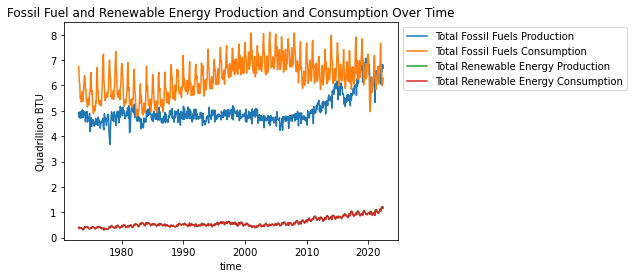

In [9]:
#plotting total fossil fuels production/consumption and total renewable energy production/consumption
sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Production', label = 'Total Fossil Fuels Production')
sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Consumption', label = 'Total Fossil Fuels Consumption')
sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Production', label = 'Total Renewable Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Consumption', label = 'Total Renewable Energy Consumption')

plt.title("Fossil Fuel and Renewable Energy Production and Consumption Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Here, we see that total renewable energy production/consumption is about equal. We note that fossil fuel consumption is higher than production usually. We also observe that while renewable energy production has been on the rise, fossil fuel production has not necessarily been on a decline. The next two plots make this clearer. We plot total renewable energy production over time, and we plot the curves for different energy source production as well to show an initial visualization how much of that renewable energy production comes form each type. We see that wind has the steepest curve as of late. We also plot simply the rise in total fossil fuels production alone over the years. 

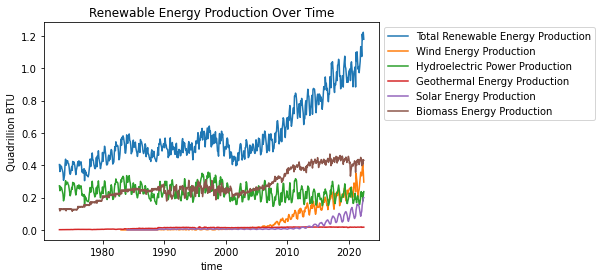

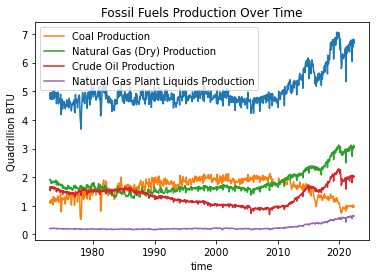

In [10]:
#plotting total renewable energy production as well as wind energy production curve
sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Production', label = 'Total Renewable Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Wind Energy Production', label = 'Wind Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Hydroelectric Power Production', label = 'Hydroelectric Power Production')
sns.lineplot(data = total_df, x = 'date', y = 'Geothermal Energy Production', label = 'Geothermal Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Solar Energy Production', label = 'Solar Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Biomass Energy Production', label = 'Biomass Energy Production')


plt.title("Renewable Energy Production Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#plotting total fossil fuels production alone over the years
sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Production')
sns.lineplot(data = total_df, x = 'date', y = 'Coal Production', label = 'Coal Production')
sns.lineplot(data = total_df, x = 'date', y = 'Natural Gas (Dry) Production', label = 'Natural Gas (Dry) Production')
sns.lineplot(data = total_df, x = 'date', y = 'Crude Oil Production', label = 'Crude Oil Production')
sns.lineplot(data = total_df, x = 'date', y = 'Natural Gas Plant Liquids Production', label = 'Natural Gas Plant Liquids Production')

plt.title("Fossil Fuels Production Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
plt.show()

To make clearer again this large dependence on fossil fuels, we make a pie chart of the most recent year's energy production by type. First, we create a new dataframe containing only data from 2022 and we take the mean of each individual energy type.

Returning data to local variable energy_2022


<function matplotlib.pyplot.show(close=None, block=None)>

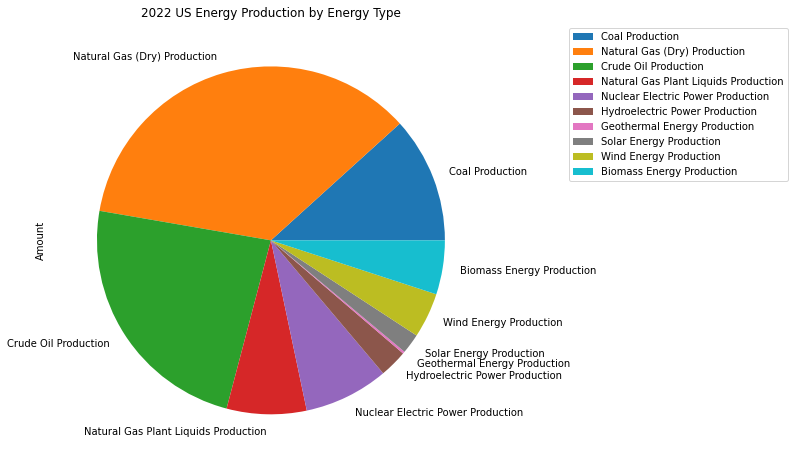

In [11]:
# make a pie chart for 2022 so far 
%sql energy_2022 << SELECT * FROM total_df WHERE year = 2022
col = energy_2022.columns
avg_production = pd.DataFrame(energy_2022[col[1:12]].mean(axis=0))
avg_production = avg_production.rename(columns={ 0 : "Amount"}).drop('Total Fossil Fuels Production')
                                                                    
avg_production.plot.pie(y='Amount', figsize=(8, 8))
plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.title("2022 US Energy Production by Energy Type")
plt.show

We note that the these curves over time look logistic. For this preliminary analysis, let us simply see total renewable energy production over the years (so we take the yearly average to find annual renewable energy production). We plot these points on a scatterplot then overlay a linear curve then an exponential curve. We see that obviously the exponential curve matches better. 

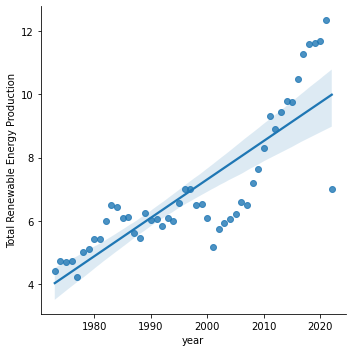

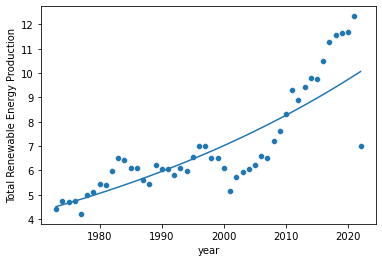

In [12]:
copy_total_df = total_df.copy()

annual_df = copy_total_df.iloc[:, [12, 26]].groupby(['year']).sum('Total Renewable Energy Production').reset_index()
annual_df

fossil_df = pd.DataFrame()
fossil_df['year'] = copy_total_df['year']
fossil_df['fossil_cons'] = copy_total_df['Total Fossil Fuels Consumption']

fpro_df = pd.DataFrame()
fpro_df['year'] = copy_total_df['year']
fpro_df['fossil_pro'] = copy_total_df['Total Fossil Fuels Production']


x = annual_df['year']
y = annual_df['Total Renewable Energy Production']

sns.lmplot(data = annual_df, x = 'year', y = 'Total Renewable Energy Production')
plt.show()

curve = np.polyfit(x, np.log(y), 1)
x_new = np.linspace(np.min(x), np.max(x))
y_new = np.exp(curve[1]) * np.exp(curve[0] * x_new)

sns.scatterplot(data=annual_df, x= x, y= y)
plt.plot(x_new, y_new)
plt.show()


As we continue, we will want to fit curves such as this one to predict both production and consumption based on past trends. In this way, we would like to anticipate ability to meet demand and forecast production and consumption over some amount of years into the future. Questions arise like will how will production and consumption compare? And then more questions will arise as we consider ref_df.

<a id=’ref_df’></a>
### Concerning ref_df

When it comes to ref_df, we want to come up with an equation or some other type of way to rank the criteria listed in the dataset. If we attach some sort of weight to each factor, we can then make a suggestion for where to best place windmills. Note that the factors contained in ref_df range from distance to an urban area to wind speed to whether land is protected and so on. Eventually, we would like to predict energy generations as well as economic output of what certain suggestions of wind mill placement will generate in the future and what percent of the demand we explore from analyzing total_df that will entail. 

Since we have yet to come up with our equation/ranking system yet, there is not much preliminary analysis we can do here that would serve much purpose. Instead, we plot the longitudes and latitudes to with the hue of capacity factor in the first map and then available area in km in the second. These will give us a good idea of where the most amount of energy generation would take place given that capacity_factor is electrical energy generated per unit capacity. The second map, however, begins to show us some of the clash between our different criteria in that the places with the largest available areas might not neceassarily always be located at the same longitudes and latitudes. 

We may plan on adding an actual map of the US underneath this scattering, but for now, it is easy to see the outline of the US without it. 

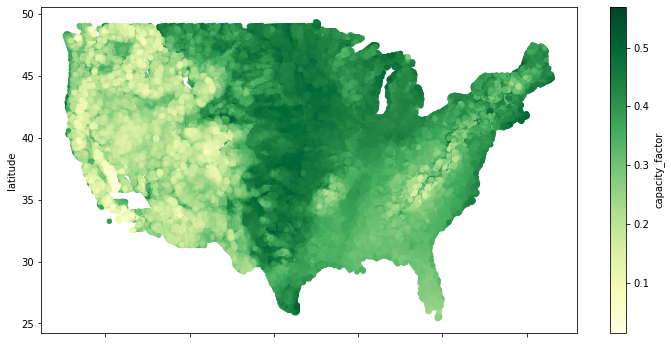

In [13]:
ref_df.plot(x="longitude", y="latitude", kind="scatter", c="capacity_factor", colormap="YlGn", figsize = (12,6))
plt.show()

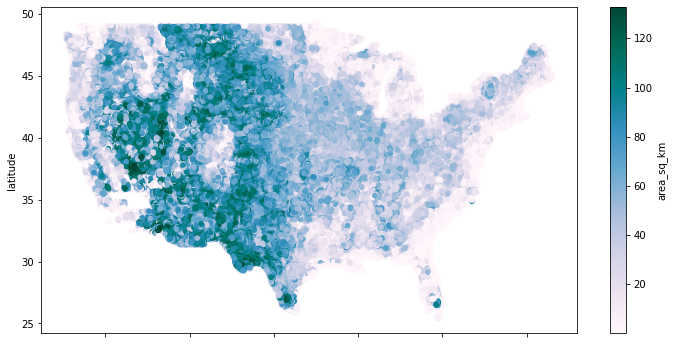

In [14]:
ref_df.plot(x="longitude", y="latitude", kind="scatter", c="area_sq_km", colormap="PuBuGn", figsize = (12,6))
plt.show()

copy_ref_df = ref_df.copy()

# Preregistration of Analysis

Here, we outline 2 different analyses that we will include in the final report, no matter the significance of said analyses. 

**Analysis 1:**
We will fit a regression model on the total renewable production/consumption given the input of time. We want to predict the next 20 years of renewable energy production/consumption. We can do a test/train split on the data to see whether the model is working well or overfitting and then evaluating metrics such as RMSE and MAE. We will also make some bootstrapping samples (dependent on size of our cleaned dataset) and train our model on each of said samples to learn more about the model and see what it tells us about our distributions. 


**Analysis 2:** 
Our dataset ref_df contains values for different characteristics that go into determining windmill placement. We will rank the locations based on parameters mentioned in phase 2.

# Phase 4 

## MODEL 1: Building a Forecasting Model for Renewable Energy Production and Consumption

As we have seen, our data for both renewable energy production and consumption is nonlinear. When creating a forecasting model, it is imperative to account for that fact that your data may interact in unexpected ways. To create a model of this data, we have to get a little creative. Namely, we use PolynomialFeatures to fit our data and run a linear regression on those transformed values. A polynomial feature of degree n is simply the addition of n-1 new columns where featuring values like $x^2, ..., x^n$ if n > 2. This will allow us to better fit our data, have a better understanding of our variables' relationship, and eventually to make a model. 

We chose degree 3 because we wanted the degree to be small to prevent overfitting, and 3 seemed to give us the least variability between our train and test RMSE scores. Low variability between train and test RMSE scores tells us that the model is working pretty well and not overfitting. We tried with degrees both higher and lower than 3 and this is how we found this out. 

As such, we transformed our input values and then trained a linear regression model with those values and our output values. Because our data is time-series, we could not do a simple train/test split. Instead, we trained the model on the first 40 rows of our dataset (our dataset is chronological), and then the last 10 years were used as the test set. Below, we plot the results of this model. We did all of this through a function we created called called run_regression which basically does all we have described above.

Note that, as we saw above, energy production and consumption were roughly the same curves so we do not make two models. Here, we just train a production model. We will later compare this to our fossil fuel production model. Then, we will consider consumption more later on.

In [15]:
def run_regression(x, y, n, s, y_lab, q):
    """
    This function takes in 5 inputs, described below. It fits with Polynomial Features before 
    feeding transformed values into a linear regression model that is trained with train 
    data and then tested on test data. Since this is a time series, the train/test split is 
    made at a specific point. Then it either outputs plot of train and test fits or RMSE/MAE
    scores given q value. 
    x = series of input values
    y = series of output values
    n = integer describing degree of PolynomialFeatures
    s = integer, describing test size
    y_lab = string, label for y axis in plot 
    q = integer, 0 if want to output train/test RMSE/MAE values. Otherwise, plot returned.
    """
    poly = PolynomialFeatures(degree=n, include_bias=False)
    x1 = poly.fit_transform(x.reshape(-1,1))

    test_size = s

    #since is time-series, have to split differently. 
    x_train = x1[:-test_size]
    y_train = y[:-test_size]
    x_test = x1[-test_size:]
    y_test = y[-test_size:]

    model_1 = LinearRegression().fit(x_train, y_train)
    predictions_train = model_1.predict(x_train)
    predictions_test = model_1.predict(x_test)

    if q == 0: 
        mse_train = mean_squared_error(y_train, predictions_train)
        mse_test = mean_squared_error(y_test, predictions_test)
        mae_train = mean_absolute_error(y_train, predictions_train)
        mae_test = mean_absolute_error(y_test, predictions_test)
        print('\ntrain RMSE = ', np.sqrt(mse_train),'\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ',\
              mae_train,'\ntest MAE = ', mae_test)
    else:  
        plt.scatter(x, y, label = "data")
        plt.plot(x[:-test_size], predictions_train, c="red", label = "train fit")
        plt.plot(x[-test_size:], predictions_test, c = "green", label = "test fit")
        plt.legend(loc='best')
        plt.xlabel('Year')
        plt.ylabel(y_lab)
        plt.title('Train and Test Fits')
        plt.show()

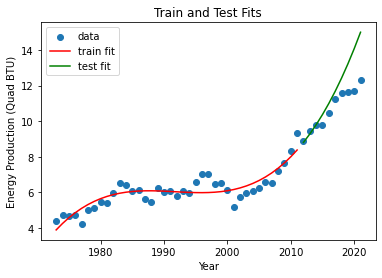

In [16]:
annual_df = annual_df.drop([49])
x = pd.array(annual_df['year'])
y = pd.array(annual_df['Total Renewable Energy Production'])

poly = PolynomialFeatures(degree=3, include_bias=False)
x1 = poly.fit_transform(x.reshape(-1,1))
    
model = LinearRegression().fit(x1, y)
y_predicted_r = model.predict(x1)

run_regression(x, y, 3, 10, 'Energy Production (Quad BTU)', 1)

**Evaluating Model and T-test**

We want to see how our model is working. For this, we calculate the train and test RMSE and MAE scores. While our test RMSE, approximately 1.293, is greater than the train RMSE of 0.4818, the discrepancy is not so large as to cause concern about the model, which is why we ruled out the possibility of overfitting. The RMSE and MAE scores are not very large.

Additionally, we output the summary statistics for this regression. We see that our p-values are extremely low. There obviously exists a relationship between time and renewable energy production. We can see that visually, and we can also see that here. Additionally, our t-scores are quite large for all coefficients which indicates we can reject the null hypothesis, which in our case, they are as follows:

**null hypothesis:** There exists no relationship between time and renewable energy production.

**alternative hypothesis:** There exists some relationship between time and renewable energy production. 

In [17]:
run_regression(x, y, 3, 10, 'Energy Production (Quad BTU)', 0)
#print('\ntrain RMSE = ', np.sqrt(mse_train),'\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ',\
#              mae_train,'\ntest MAE = ', mae_test)
#print(model_1.coef_)

x_up = x1.tolist()
y_up = y.tolist()
x_up = sm.add_constant(x_up)
 
result = sm.OLS(y_up, x_up).fit()
print(result.summary())


train RMSE =  0.48187438541725797 
test RMSE =  1.2930917663317492 
train MAE =  0.38060756459555484 
test MAE =  0.9220173469425559
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.77e-21
Time:                        13:56:05   Log-Likelihood:                -56.004
No. Observations:                  49   AIC:                             118.0
Df Residuals:                      46   BIC:                             123.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

**Next 20 Years Predictions** 

Next, we use our model to predict the next 20 years of energy production in the US. Domain knowledge tells us that renwable energy production in the US is bound to increase until eventually hitting a plateau. There will be a plateau since there is a finite amount of renewable resources available. We know this rate is bound to be exponential and by 2030 to be hitting a very steep increase. We plot these predictions below.

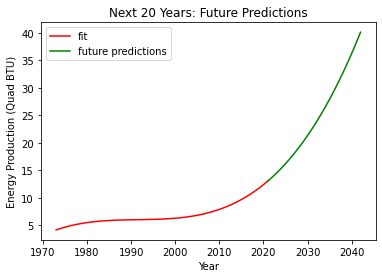

In [18]:
years = np.linspace(2021, 2042, 22)
years_res = poly.fit_transform(years.reshape(-1,1))
new_pred_r = model.predict(years_res)

plt.plot(x, y_predicted_r, c="red", label = "fit")
plt.plot(years, new_pred_r, c = "green", label = "future predictions")
plt.xlabel('Year')
plt.ylabel('Energy Production (Quad BTU)')
plt.title('Next 20 Years: Future Predictions')
plt.legend(loc='best')
plt.show()

future_df = pd.DataFrame([])
future_df['year'] = years
future_df['Total Renewable Energy Production'] = new_pred_r
total_df = pd.concat([annual_df, future_df])

**4 Parameter Sigmoid Function** 

Now, we know that eventually, there will be a cap on renewable energy production. To visualize this, we use a 4-parameter s-curve. A 4 parameter s-curve is usually given by 
$$ f(x) = \frac{A-D}{1+ (\frac{x}{C})^B} + D $$

where, 

$A$ = lower asymptote. For our initial guess, we fed in minimum of our output values.

$D$ = upper asymptote (this is your "carrying capacity"). We fed a value of 85 quadrillion BTU, which is around the ballpark of where fossil fuel production is now. 

$C$ = point of inflection. We guessed the year 2030 based on prior predictions others have made. 

$B$ = steepness of curve at C. We guessed median of input values.

$x$ = input, which is time/year in this case

We created a function to make this s-curve and then another function to use it to make predictions. We fit this 4 parameter s-curve and then used it to predict renewable energy production until 2060 and displayed a plot of those results.

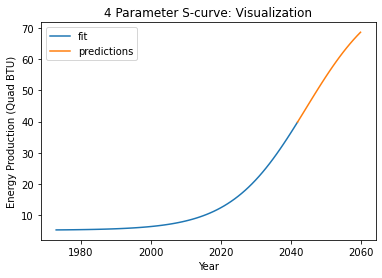

In [19]:
x = pd.array(total_df['year'])
y = pd.array(total_df['Total Renewable Energy Production'])

def fourPL(x, A, B, C, D):
    return ((A-D)/(1.0+((x/C)**(B))) + D)

def PL4_pred (x):
    y_pred = ((A-D)/(1.0+((x/C)**(B))) + D)
    return y_pred

guess = [min(y), np.median(x), 2030 , 85] 
params, params_covariance = curve_fit(fourPL, x, y, guess)

A = params[0]
B = params[1]
C = params[2]
D = params[3]

upy = np.linspace(2042, 2060, 19)
new_y_vals_3 = np.zeros(19)
for i in range(19):
    out = PL4_pred(upy[i])
    new_y_vals_3[i] = out

y_nnn = fourPL(x, *params)
#plt.plot(x, y, 'o', label='data')
plt.plot(x,y_nnn, label='fit')
plt.plot(upy, new_y_vals_3, label = 'predictions')
plt.xlabel('Year')
plt.ylabel('Energy Production (Quad BTU)')
plt.title('4 Parameter S-curve: Visualization')
plt.legend(loc='best')
plt.show()

## MODEL 2: Building Forecasting Model for Fossil Fuel Energy Production and Consumption

We run a very similar process for the fossil fuel energy consumption as we did for model 1. Please see above to see description. The only difference here is that our train test split is different, namely test size is 15 this time. We can try a to fit a four-parameter bell-shaped logistic equation for the future part -> will be analagous to our s-curve in renewables.

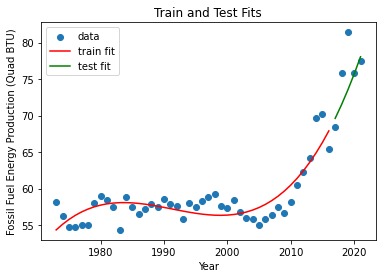

In [20]:
fpro_df = fpro_df.groupby(['year']).sum('fossil_pro').reset_index()
fpro_df = fpro_df.drop([49])

x_p = pd.array(fpro_df['year'])
y_p = pd.array(fpro_df['fossil_pro'])

poly = PolynomialFeatures(degree=3, include_bias=False)
x1 = poly.fit_transform(x_p.reshape(-1,1))
    
model = LinearRegression().fit(x1, y_p)
y_predicted_p = model.predict(x1)

run_regression(x_p, y_p, 3, 5, 'Fossil Fuel Energy Production (Quad BTU)', q = 1)

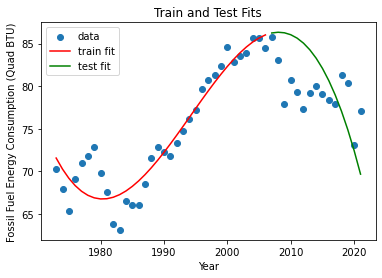

In [21]:
fossil_df = fossil_df.groupby(['year']).sum('fossil_cons').reset_index()
fossil_df = fossil_df.drop([49])

x_f = pd.array(fossil_df['year'])
y_f = pd.array(fossil_df['fossil_cons'])

poly = PolynomialFeatures(degree=3, include_bias=False)
x1 = poly.fit_transform(x_f.reshape(-1,1))
    
model = LinearRegression().fit(x1, y_f)
y_predicted_f = model.predict(x1)

run_regression(x_f, y_f, 3, 15, 'Fossil Fuel Energy Consumption (Quad BTU)', q = 1)

**Evaluating Model and T-test**

We want to see how our model is working. For this, we calculate the train and test RMSE and MAE scores. Our RMSE scores from train and test are approximately 2.19 and 4.95 respectively. These values vary from each other, but the discrepancy is not so high that we consider excess overfitting.

Additionally, we output the summary statistics for this regression. We see that our p-values are extremely low. There obviously exists a relationship between time and fossil fuel energy consumption. We can see that visually, and we can also see that here. Additionally, our t-scores are quite large for all coefficients which indicates we can reject the null hypothesis. 

**null hypothesis:** There exists no relationship between time and fossil fuel energy consumption.

**alternative hypothesis:** There exists some relationship between time and fossil fuel energy consumption. 

In [22]:
run_regression(x_f, y_f, 3, 15, 'Fossil Fuel Energy Consumption (Quad BTU)', 0)
#print('\ntrain RMSE = ', np.sqrt(mse_train),'\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ',\
#              mae_train,'\ntest MAE = ', mae_test)
#print(model_1.coef_)

x_up = x1.tolist()
y_up = y_f.tolist()
x_up = sm.add_constant(x_up)
 
result = sm.OLS(y_up, x_up).fit()
print(result.summary())


train RMSE =  2.192974304434023 
test RMSE =  4.948990528535025 
train MAE =  1.6668085297187214 
test MAE =  4.281138227770288
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     40.52
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           7.12e-11
Time:                        13:56:05   Log-Likelihood:                -136.06
No. Observations:                  49   AIC:                             278.1
Df Residuals:                      46   BIC:                             283.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

**Next 20 Years Predictions** 

Next, we use our model to predict the next 20 years of fossil fuel energy consumption in the US. Domain knowledge tells us it is bound to decrease. We plot these predictions below.

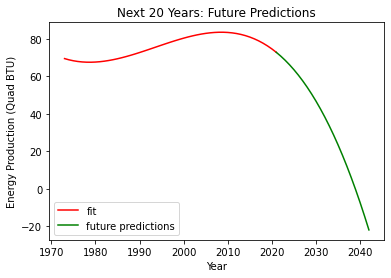

In [23]:
years = np.linspace(2021, 2042, 22)
years_res = poly.fit_transform(years.reshape(-1,1))
new_pred_f = model.predict(years_res)

plt.plot(x_f, y_predicted_f, c="red", label = "fit")
plt.plot(years, new_pred_f, c = "green", label = "future predictions")
plt.xlabel('Year')
plt.ylabel('Energy Production (Quad BTU)')
plt.title('Next 20 Years: Future Predictions')
plt.legend(loc='best')
plt.show()

future_df = pd.DataFrame([])
future_df['year'] = years
future_df['Total Renewable Energy Production'] = new_pred_f
total_df = pd.concat([annual_df, future_df])

## 4 Parameter Bell-Shaped Curve

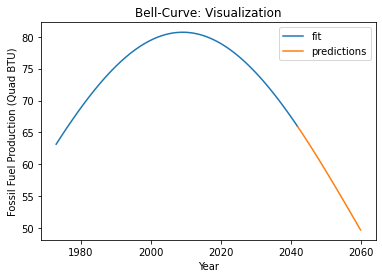

In [24]:
def gaussian_curve(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

def gauss_pred (x):
    y_pred = a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))
    return y_pred

#guess = [min(y), np.median(x), 2030 , 85] 

pars, cov = curve_fit(gaussian_curve, x_f, y_f, p0 = [1, 2010, 1], bounds = (-np.inf, np.inf))

a = pars[0]
b = pars[1]
c = pars[2]

upy_f = np.linspace(2042, 2060, 19)
new_y_vals_3_f = np.zeros(19)
for i in range(19):
    out_f = gauss_pred(upy[i])
    new_y_vals_3_f[i] = out_f

y_nnn_f = gaussian_curve(x, *pars)
#plt.plot(x_f, y_f, 'o', label='data')
plt.plot(x,y_nnn_f, label='fit')
plt.plot(upy_f, new_y_vals_3_f, label = 'predictions')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel Production (Quad BTU)')
plt.title('Bell-Curve: Visualization')
plt.legend(loc='best')
plt.show()

# Comparing Renewable Energy and Fossil Fuel Consumption

Since the renewable energy production and consumption curves were pretty much the same, we consider our production model here when comparing comsumption. Below, we superimpose the curves from above on the same graph to see differences in predicted renewable energy and fossil fuel consumption. We see that renewable energy does not reach heights of fossil fuels. While this is consumption, these curves are not dissimilar from their counterpart production curves. We will still run these, but for now, we can see that at least by the 2040s, based on this model, energy demands will seemingly not be met. 

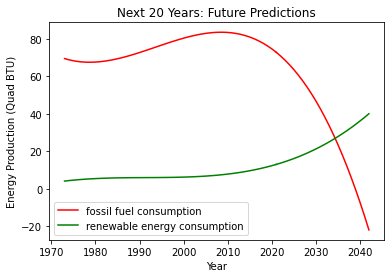

In [40]:
x_n = pd.array(annual_df['year'])
plt.plot(x_f, y_predicted_f, c="red", label = "fossil fuel consumption")
plt.plot(years, new_pred_f, c = "red")
#years = np.linspace(2022, 2042, 21)
plt.plot(x_n, y_predicted_r, c="green", label = "renewable energy consumption")
plt.plot(years, new_pred_r, c = "green")
plt.xlabel('Year')
plt.ylabel('Energy Production (Quad BTU)')
plt.title('Next 20 Years: Future Predictions')
plt.legend(loc='best')
plt.show()

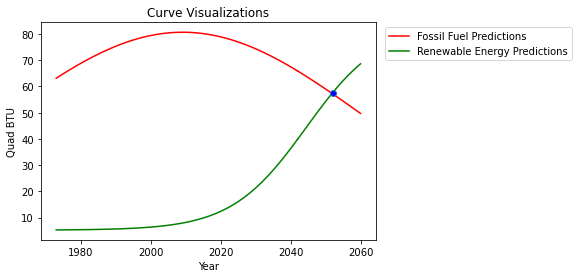

In [68]:
plt.plot(x,y_nnn_f, c = 'red')
plt.plot(upy_f, new_y_vals_3_f, c = 'red', label = 'Fossil Fuel Predictions')
plt.xlabel('Year')
plt.ylabel('Quad BTU')
plt.title('Curve Visualizations')
plt.plot(x,y_nnn, c = 'green')
plt.plot(upy, new_y_vals_3, c = 'green', label = 'Renewable Energy Predictions')
plt.legend(bbox_to_anchor=(1.6, 1.0))
plt.plot(2052, new_y_vals_3[10], 'o', markerfacecolor="blue")
plt.show()

# Finding Optimal positions for Windmill Placement

In this next part of our project, we will be focusing on predicting the best positions for windmill placement to cover the energy gap predicted by our models in the next 20 years.

We have divided the parameters used to judge the likelihood of a certain area being a potentially good location for a windmill farm into 3 broad categories:

1. Efficiency Based Parameters

2. Location Based Parameters

3. Monetary based Parameters

For reference, below is the dataset we started working with:

In [27]:
ref_df.head()

,latitude,longitude,area_sq_km,capacity_mw,generation_mwh,capacity_factor,wind_speed,distance_to_transmission_km
0,38.668999,-90.156998,0.5427,1.6281,5217.820421,0.365851,6.752910,0.041277
1,45.380001,-92.155998,8.6184,25.8552,97673.112905,0.431244,7.488254,0.055366
2,47.574001,-95.418999,13.9968,41.9904,174115.603258,0.473351,8.025779,0.076005
3,38.020000,-100.928001,23.4252,70.2756,285496.416362,0.463759,8.148561,0.104679
4,41.917000,-96.801003,30.2292,90.6876,373754.694846,0.470473,7.991315,0.132139


## Efficiency Based Parameters

One of our main considerations is the expected **capacity factor** of the wind turbine placed at a certain location. Capacity factor of a wind turbine refers to its average power output divided by its maximum power capability. In essence, it is a measure of predicted realistic performance. For a wind turbine, the maximum possible output would be the capacity x 8760 hr (there are 8760 hrs in a year). 

Capacity factor of land-based wind in the U.S. ranges from 24% to 56% and averages at 36% (from University of Michigan's center of Sustainable system). The histogram below shows the distribution of the capacity factor in our dataset.

Additionally, we also show just because a placement might have a high capacity factor does not necessarily mean its other values will necessarily be optimal. We want a high distance to transmission value, but when we plot capacity factor vs distance to transmission, we see that it is not a monotonically increasing relationship. We also calculate our Spearman coefficient to illustrate this as well. 

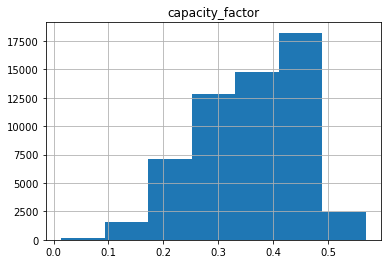

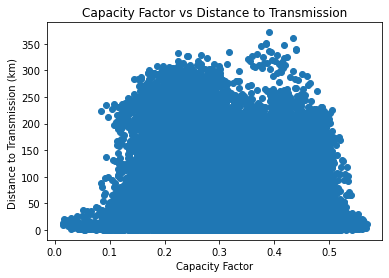

(57123, 8)


In [28]:
ref_df.hist(column = 'capacity_factor', bins = 7)
plt.show()

plt.scatter(data = ref_df, x = 'capacity_factor', y = 'distance_to_transmission_km')
plt.title("Capacity Factor vs Distance to Transmission")
plt.xlabel("Capacity Factor")
plt.ylabel("Distance to Transmission (km) ")
plt.show()

print(ref_df.shape)

According to our research, it seems to be economically viable to have a wind turbine whose capacity factor lies somewhere between 30% to 60%. This covers our average and makes sure we are not wasting our resources and getting somewhat of a practical return on investment. After putting this restriction, we have done some of our inital filtering with our potential options coming down from 57123 to 29698.

In [29]:
ref_df.drop(ref_df[ref_df['capacity_factor'] < 0.36].index, inplace = True)
print(ref_df.shape)

(29698, 8)


## Location based Parameters

**Annual Average Wind**

Given the setup of a windmill, we generally are looking for an area with an annual average wind speed of at least 9 miles per hour (mph)—or 4 meters per second (m/s)—for small wind turbines and 13 mph (5.8 m/s) for utility-scale turbines. This is the floor for consideration as a potential area.


**Distance from obstacle**

Furthermore, we want to look at the geographical area around the windmill. The optimal physical location would be a plain terrain without any "obstacles" nearby (this means that the area should not be surrounded very closely by mountains or should not be located at the endge of a valley). The way we have calculated this is by looking at the squared area available to us for the wind farm.


Our research shows that the industry rule of thumb is as follows: the distance between a turbine and the nearest obstacle should be at least twice the turbine height, unless the turbine is more than twice the height of the obstacle in which case the distance can be less (we are not considering the second part due to added complexities). We have taken our wind turbine height to be 120m which means we want there to be aleast 0.5 sq km distance.

**Distance to Urban Setting**

For this parameter, we are considering some of the social constraints of locating windmills close to urban settings. Usually, residents do not like living close to a windfarm. We want distance of transmission to be maximized. 

In [30]:
ref_df.drop(ref_df[ref_df['wind_speed'] < 9].index, inplace = True)
ref_df.drop(ref_df[ref_df['area_sq_km'] < 0.5].index, inplace = True)
ref_df.drop(ref_df[ref_df['distance_to_transmission_km'] < 0.015].index, inplace = True)

After our second phase of filtering we are working with the following list of potential locations:

In [31]:
print(ref_df.shape)
ref_df.head()

(517, 8)


,latitude,longitude,area_sq_km,capacity_mw,generation_mwh,capacity_factor,wind_speed,distance_to_transmission_km
243,41.748001,-104.765999,77.3064,231.9192,9.809760e+05,0.482856,9.374555,0.988811
257,31.177000,-101.610001,53.8812,161.6436,7.474885e+05,0.527888,9.032588,1.113613
991,44.349998,-103.758003,24.1380,72.4140,3.132567e+05,0.493826,9.114613,2.223284
998,35.560001,-101.022003,34.9920,104.9760,4.960767e+05,0.539454,9.255863,2.710226
1156,34.214001,-105.545998,101.8656,305.5968,1.385455e+06,0.517535,9.617157,2.564640


## Monetary Based Parameters

Lastly, to make our predictions more applicable, we came up with a formula which can help calculate approximate cost of building a wind farm in a certain location. We have not made assumptions about what kind of budget is available to us which is why we have left this part as a future work for making our model more applicable instead of incorporating into our windmill location ranking system.


Our formula consists of the following parameters:

$FCR$ = Fixed Charge Rate

*The fraction of the Total Installed Cost that must be set aside each year to retire capital costs to cover the interest on debt, return on equity, etc.For our purposes, we can assume this to be 7% or 0.07.*

$CE$ = Capital Expenditure

*The initial upfront capital required for set up (basically the inital cost)*

$AEP$ = Net Annual Energy Production

*Refers to the cost per kwH of energy generated. Comes from the capacity factor*

$RC$ = Replacement Cost

*RC = Cost of turbine / Expected life + other costs. Refers to all the sinking cost related to replacement and overhauls of the mechanical or other technological aspects of the windmill.*

Based on the parameters written above we can develop the following equation:

$$ C = \frac{FCR * CE}{AEP} + \frac{RC}{AEP} $$

## Ranking Windmill Placement Location

Here, we plot the locations that we are left with after filtering. Then, we consider the most important factors, namely area, distance to transmission, and capacity factor. We find the min and max values of each and then place them in 5 subsections, assigning each a score 1-5. A higher score is associated with a better value for windmill placement. Once we do this, we add the different scores to assign each placement a cumulative score and then rank those placements accordingly. 

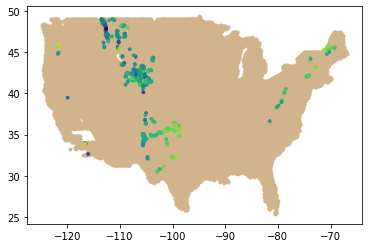

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(copy_ref_df['longitude'], copy_ref_df['latitude'], s=8, c='tan')
ax1.scatter(ref_df['longitude'], ref_df['latitude'], s=8, c=ref_df['capacity_factor'])
plt.show()

copy_df = ref_df.copy()

#print('area_sq_km:', min(ref_df['area_sq_km']), max(ref_df['area_sq_km']))
#print('capacity_factor:', min(ref_df['capacity_factor']), max(ref_df['capacity_factor']))
#print('distance_to_transmission_km:', min(ref_df['distance_to_transmission_km']), max(ref_df['distance_to_transmission_km']))

copy_df['area_sq_km'][copy_df['area_sq_km'] <25] = 1
copy_df['area_sq_km'][(copy_df['area_sq_km'] >= 25) & (copy_df['area_sq_km'] < 50)] = 2
copy_df['area_sq_km'][(copy_df['area_sq_km'] >= 50) & (copy_df['area_sq_km'] < 75)] = 3
copy_df['area_sq_km'][(copy_df['area_sq_km'] >= 75) & (copy_df['area_sq_km'] < 100)] = 4
copy_df['area_sq_km'][copy_df['area_sq_km'] >= 100] = 5

copy_df['capacity_factor'][copy_df['capacity_factor'] < 0.4] = 1
copy_df['capacity_factor'][(copy_df['capacity_factor'] >= 0.43) & (copy_df['capacity_factor'] <= 0.46)] = 2
copy_df['capacity_factor'][(copy_df['capacity_factor'] > 0.46) & (copy_df['capacity_factor'] <= 0.49)] = 3
copy_df['capacity_factor'][(copy_df['capacity_factor'] > 0.49) & (copy_df['capacity_factor'] <= 0.52)] = 4
copy_df['capacity_factor'][copy_df['capacity_factor'] > 0.52] = 5

copy_df['distance_to_transmission_km'][copy_df['distance_to_transmission_km'] <= 34] = 1
copy_df['distance_to_transmission_km'][(copy_df['distance_to_transmission_km'] > 34) & (copy_df['distance_to_transmission_km'] <= 68)] = 2
copy_df['distance_to_transmission_km'][(copy_df['distance_to_transmission_km'] > 68) & (copy_df['distance_to_transmission_km'] <= 102)] = 3
copy_df['distance_to_transmission_km'][(copy_df['distance_to_transmission_km'] > 102) & (copy_df['distance_to_transmission_km'] <= 136)] = 4
copy_df['distance_to_transmission_km'][copy_df['distance_to_transmission_km'] > 136] = 5

copy_df['score'] = copy_df['area_sq_km'] + copy_df['capacity_factor'] + copy_df['distance_to_transmission_km']
copy_df['rank'] = copy_df['score'].rank(ascending = False, method = 'dense')
copy_df = copy_df.sort_values(by=['rank'])

The resulting filtered, ranked, and sorted dataset looks as follows:

In [33]:
copy_df

,latitude,longitude,area_sq_km,capacity_mw,generation_mwh,capacity_factor,wind_speed,distance_to_transmission_km,score,rank
44853,43.263000,-105.589996,5.0,319.0104,1.305578e+06,5.000000,9.027156,4.0,14.000000,1.0
49289,42.855000,-107.185997,4.0,297.6264,1.184684e+06,5.000000,9.110112,5.0,14.000000,1.0
47156,48.978001,-113.483002,4.0,227.0592,8.763810e+05,5.000000,9.788258,5.0,14.000000,1.0
45363,43.175999,-105.425003,5.0,369.9432,1.534417e+06,5.000000,9.092025,4.0,14.000000,1.0
43762,48.724998,-113.066002,5.0,326.9808,1.327361e+06,5.000000,9.402153,4.0,14.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
39553,47.972000,-112.670998,2.0,144.0504,5.115209e+05,0.405364,10.440126,2.0,4.405364,16.0
2880,42.825001,-106.275002,2.0,79.8012,2.999399e+05,0.429063,9.371449,1.0,3.429063,17.0
24275,46.138000,-110.217003,2.0,111.5856,4.067275e+05,0.416094,9.505903,1.0,3.416094,18.0
23488,32.659000,-116.033997,1.0,22.2345,8.130919e+04,0.417454,9.155038,1.0,2.417454,19.0


In [34]:
area = pd.Series(copy_df['area_sq_km'])
cap = pd.Series(copy_df['capacity_factor'])
dist = pd.Series(copy_df['distance_to_transmission_km'])
print('Spearman correlation between area and capacity factor:\n', stats.spearmanr(area, cap))
print('Spearman correlation between distance to transmission and capacity factor:\n', stats.spearmanr(dist, cap))
print('Spearman correlation between area and distance to transmission:\n', stats.spearmanr(area, dist))

Spearman correlation between area and capacity factor:
 SpearmanrResult(correlation=0.08838387175598864, pvalue=0.04456807923077164)
Spearman correlation between distance to transmission and capacity factor:
 SpearmanrResult(correlation=-0.07226197721377166, pvalue=0.10074853230507735)
Spearman correlation between area and distance to transmission:
 SpearmanrResult(correlation=0.1573802602535036, pvalue=0.00032789421047376403)


# Conclusion and Future Directions

We still have analyses that we want to run, namely looking at energy production. Because of this, we cannot complete the conclusion at this time. To see a more tentative conclusion, please see *Comparing Renewable Energy and Fossil Fuel Consumption* section above. 

# Limitations
## Dataset Limitations

- **Geographic limitations:** Our datasets are focused on energy production and consumption inside the United States. The conclusions may not be generalizable across other regions.
- **Time period limitations:** Our dataset is between the time period of late 1900s until 2022.
- **Factor consideration limitations:** We are considering very limited factors which, according to our research, seemed to have high priority. This might not be comprehensive since we are not including monetary restrictions, inflation, other economic considerations, climate and natural disaster prone areas etc.
- **Social factor consideration limitations:** We are entering an era of activism for climate change which is causing social changes. This change may not necessarily be measurable by the tools we are familiar with by now and hence are excluded from our model.
- **Assumption limitation:** We are considering consumption to be equal to demand in our analysis which might not always be the case.

## Analysis and Model Limitations

**Limitations for Model 1** 

- Since we were using a time-series, we tested on the last 10 year data. However, some of the years in our test set are outliers due to the Covid-19 which we have not necessarily taken into consideration.

**Limitations for Model 2** 

- similar to model 1

**Wind Placement ranking system** 

- The formula for calculating the cost of windmill farm is not extensive enough. The formula is a simplified version of calculating an approximate cost just for ranking but requires a lot of assumption regarding budgetary considersations.

# Acknowledgements

*Here, we list any other sites that might have helped us but not included in the links to our datasets:*

for color scheme identifiers on maps: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html

for plotting maps:
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

for some questions on datetime:
https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/

for how to make a pie plot:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

Resources used for creating the windmill location ranking system: 

https://www.eia.gov/energyexplained/wind/where-wind-power-is-harnessed.php#:~:text=Favorable%20sites%20include%20the%20tops,elevations%20above%20the%20earth's%20surface

https://www.windpowerengineering.com/guidelines-selecting-sites/

https://www.e-education.psu.edu/emsc297/node/649#:~:text=The%20formula%20is%20capacity%20factor,yr%20(or%20832.2%20MWh)

https://www.windpowerengineering.com/windpower-profitability-and-break-even-point-calculations/

Thanks for reading!

# Questions for Reviewers

1. Do you think we should run more signifance testing? 
2. We are trying to build a model for fossil fuel production as well, but that is exponential. We know through domain knowledge that it should decrease, but we are not sure how to include this in our model as we are just training it on past trends right now. Any suggestions? We had a similar issue with renewables when we tried to fit a sigmoid function. We could not feed that into the model though.
3. We were a bit concerned about the differences in our train and test RMSE scores. What do you think about our values? 